## **Sales over time - Timeseries forecasting:**

### **Dependencies:**

In [1]:
import copy 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

### **Get data and display first few and last few records:**

In [2]:
df = pd.read_excel('Sales Force Data.xlsx')
df['fCreditPuer'] = df['fCreditPure'] 
df['fSalesPuer'] = df['fSalesPure'] 
df.drop(columns = ['fCreditPure','fSalesPure'],axis=1,inplace=True)
df.head()

,iPersonID,dtPeriod,iDistID,iManID,fSales,fCredit,fCreditPuer,fSalesPuer
0,40005,2017-01-01,40005,40005,0.0,0.0,NaN,1514.0
1,40008,2017-01-01,40008,40008,1879.0,0.0,NaN,NaN
2,40011,2017-01-01,40011,40011,4377.0,0.0,NaN,420.0
3,45898,2017-01-01,40005,40200,0.0,0.0,NaN,362.0
4,45921,2017-01-01,40005,40200,0.0,0.0,NaN,427.0


In [26]:
df.tail()

,iPersonID,dtPeriod,iDistID,iManID,fSales,fCredit,fCreditPuer,fSalesPuer
721273,83347,2020-01-03,83347,83347,971314.0,378560.0,191630.0,319985.0
721274,83348,2020-01-03,83348,83348,84560.0,83650.0,87770.0,95245.0
721275,83372,2020-01-03,74783,77385,1310.0,0.0,0.0,115.0
721276,83379,2020-01-03,40030,40030,2400.0,0.0,0.0,3600.0
721277,83398,2020-01-03,40333,127189,0.0,0.0,0.0,1620.0


### **Zero-impute all missing values on sales and records:**

In [3]:
df.fillna(0, inplace=True)
df.head()

,iPersonID,dtPeriod,iDistID,iManID,fSales,fCredit,fCreditPuer,fSalesPuer
0,40005,2017-01-01,40005,40005,0.0,0.0,0.0,1514.0
1,40008,2017-01-01,40008,40008,1879.0,0.0,0.0,0.0
2,40011,2017-01-01,40011,40011,4377.0,0.0,0.0,420.0
3,45898,2017-01-01,40005,40200,0.0,0.0,0.0,362.0
4,45921,2017-01-01,40005,40200,0.0,0.0,0.0,427.0


### **Record attributes, number of records and number of periods:**

In [28]:
print("The attributes of our data frames:")
for k in df.keys():
    print(k)
print('\n')
Number_of_Records = len(df)
Number_of_periods = len(df['dtPeriod'].unique())
print("The number of records is: {}".format(Number_of_Records))
print("The number of periods is: {}".format(Number_of_periods))

The attributes of our data frames:
iPersonID
dtPeriod
iDistID
iManID
fSales
fCredit
fCreditPuer
fSalesPuer


The number of records is: 721278
The number of periods is: 39


### **Aggregate Sales and Returns for Home category:**

In [8]:
df_home = copy.deepcopy(df)
df_home['Home_net_Sales'] = df_home['fSales'] - df_home['fCredit']
df_home.drop(['fSales','fCredit','fSalesPuer','fCreditPuer'], axis=1, inplace=True)
df_home.head()

,iPersonID,dtPeriod,iDistID,iManID,Home_net_Sales
0,40005,2017-01-01,40005,40005,0.0
1,40008,2017-01-01,40008,40008,1879.0
2,40011,2017-01-01,40011,40011,4377.0
3,45898,2017-01-01,40005,40200,0.0
4,45921,2017-01-01,40005,40200,0.0


### **Aggregate Sales and Returns for Puer category:**

In [9]:
df_Puer = copy.deepcopy(df)
df_Puer['Puer_net_Sales'] = df_Puer['fSalesPuer'] - df_Puer['fCreditPuer']
df_Puer.drop(['fSales','fCredit','fSalesPuer','fCreditPuer'], axis=1, inplace=True)
df_Puer.head()

,iPersonID,dtPeriod,iDistID,iManID,Puer_net_Sales
0,40005,2017-01-01,40005,40005,1514.0
1,40008,2017-01-01,40008,40008,0.0
2,40011,2017-01-01,40011,40011,420.0
3,45898,2017-01-01,40005,40200,362.0
4,45921,2017-01-01,40005,40200,427.0


### **Aggregate Sales and Returns for both categories:**

In [10]:
df_All_Categories = copy.deepcopy(df)
df_All_Categories['Total_net_Sales'] = df_All_Categories['fSales'] - df_All_Categories['fCredit'] + df_All_Categories['fSalesPuer'] - df_All_Categories['fCreditPuer']
df_All_Categories.drop(['fSales','fCredit','fSalesPuer','fCreditPuer'], axis=1, inplace=True)
df_All_Categories.head()

,iPersonID,dtPeriod,iDistID,iManID,Total_net_Sales
0,40005,2017-01-01,40005,40005,1514.0
1,40008,2017-01-01,40008,40008,1879.0
2,40011,2017-01-01,40011,40011,4797.0
3,45898,2017-01-01,40005,40200,362.0
4,45921,2017-01-01,40005,40200,427.0


### **Sales per period on Home products:**

In [29]:
periods = df_home.groupby('dtPeriod')
records_per_periods = {}
sales_per_periods = {}
for key in periods.groups.keys():
    records_per_periods.update({key:len(periods.get_group(key))})
    sales_per_periods.update({key:periods.get_group(key)['Home_net_Sales'].sum()})

Text(0.5, 1.0, 'Number of sales per period')

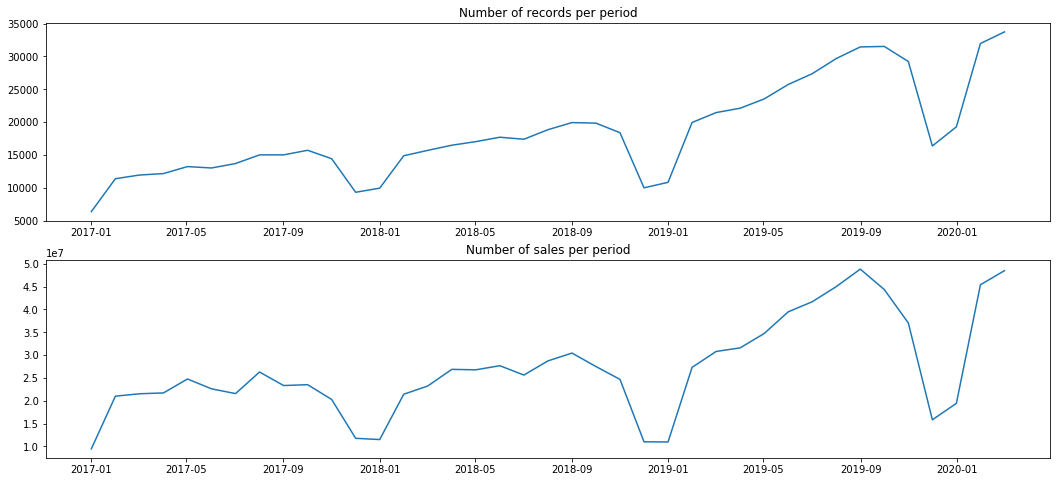

In [30]:
times = pd.date_range(start='2017-01-01', end='2020-03-01',periods=39)
Month = np.array(times)

plt.figure(figsize=(18,8))
plt.subplot(211)
plt.plot(Month,np.array(list(records_per_periods.values())))
plt.title('Number of records per period')
plt.subplot(212)
plt.plot(Month,np.array(list(sales_per_periods.values())))
plt.title('Number of sales per period')

### **Time series forecasting for sales:**

#### **Convert series to stationary: Differenciating:**

,Home_net_Sales
dtPeriod,
2017-01-01 00:00:00.000000000,9486807.11
2017-01-31 09:28:25.263157894,21011165.19
2017-03-02 18:56:50.526315789,21537908.19
2017-04-02 04:25:15.789473684,21723578.01
2017-05-02 13:53:41.052631578,24773967.55


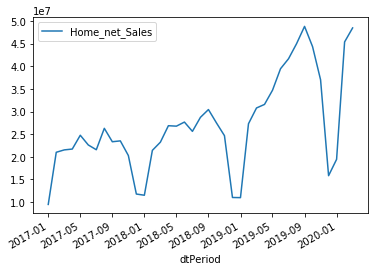

In [13]:
# Test for stationarity: Mean, variance and covariance is constant over periods: 
# Not stationary --> because it has trend (we can also look at the Autocorrelation: if the correlation coefficient decay slowly it shows that it is not stationary)
# Convert series to stationary: Differenciating
sales = pd.DataFrame({'dtPeriod': X, 'Home_net_Sales': np.array(list(sales_per_periods.values()))})
sales.set_index('dtPeriod',inplace=True)
sales.plot()
sales.head()

In [15]:
sales_diff = sales.diff(periods = 24)
sales_diff = sales_diff[24:]

In [25]:
sales_diff = sales - sales.shift(24)
# sales_diff

#### Train AR model for sales forecasting:

In [32]:
from statsmodels.tsa.ar_model import AR
SALES = sales.values
train = SALES[0:28]
test = SALES[28:]

model_ar = AR(train)
model_ar_fit = model_ar.fit()

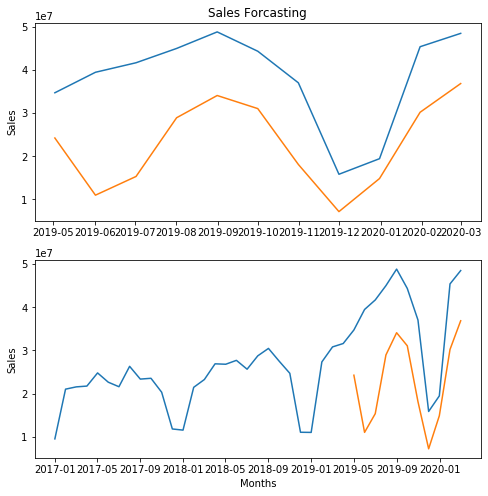

In [40]:
predictions = model_ar_fit.predict(start=28,end=38)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(Month[28:],test)
plt.plot(Month[28:],predictions)
plt.ylabel('Sales')
# plt.xlabel('Months')
plt.title('Sales Forcasting')
plt.subplot(212)
plt.plot(Month,SALES)
plt.plot(Month[28:],predictions)
plt.ylabel('Sales')
plt.xlabel('Months')
plt.show()

#### **Train ARIMA model for sales forecasting:**
NB: Will not work because the data is seasonal so we can use Seasonal ARIMAX

In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# NB: The p, d and q parameters must be specified during training:
# p is the number of time unit you are taking for the autoregression
# d is the order of integration (how many times differencing is done)
# q indicates the number of periods for the moving average
# model_arima = ARIMA(train,order=(1,1,0))

model_sarimax = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,24))
model_sarimax_fit = model_sarimax.fit()

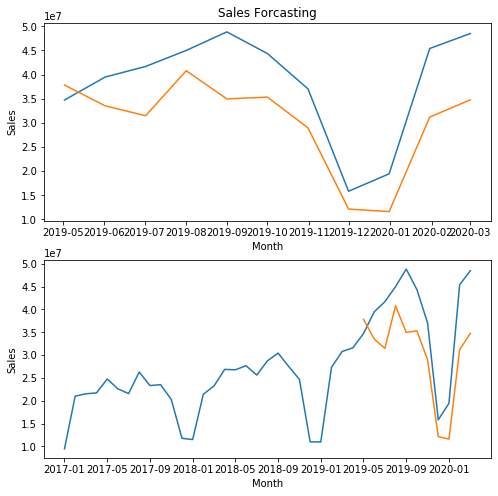

In [39]:
predictions = model_sarimax_fit.predict(start=28,end=38)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(Month[28:],test)
plt.plot(Month[28:],predictions)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.title('Sales Forcasting')
plt.subplot(212)
plt.plot(Month,SALES)
plt.plot(Month[28:],predictions)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

### **Sales period performance on Puer products:**

In [91]:
periods = df_Puer.groupby('dtPeriod')
records_per_periods = {}
sales_per_periods = {}
for key in periods.groups.keys():
    records_per_periods.update({key:len(periods.get_group(key))})
    sales_per_periods.update({key:periods.get_group(key)['Puer_net_Sales'].sum()})

Text(0.5, 1.0, 'Number of sales per period')

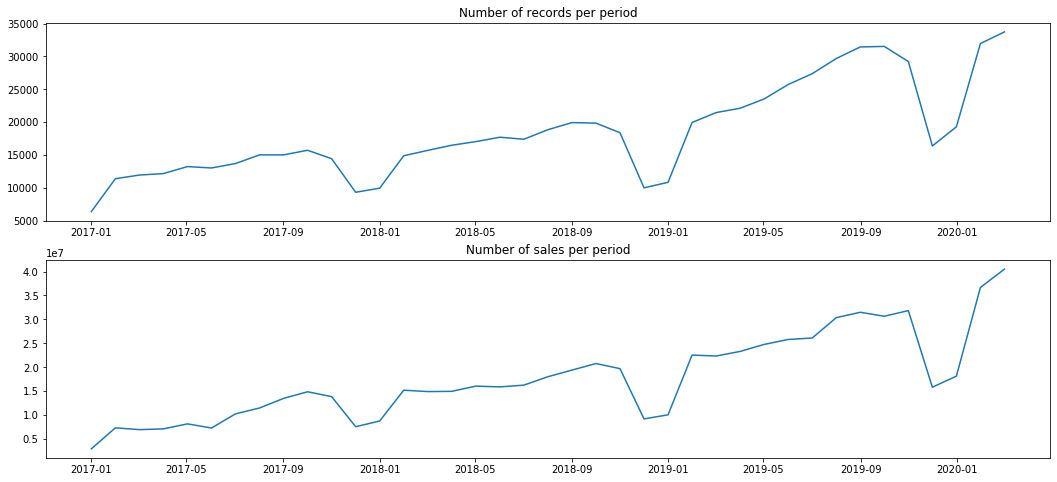

In [92]:
times = pd.date_range(start='2017-01-01', end='2020-03-01',periods=39)
X = np.array(times)

plt.figure(figsize=(18,8))
plt.subplot(211)
plt.plot(X,np.array(list(records_per_periods.values())))
plt.title('Number of records per period')
plt.subplot(212)
plt.plot(X,np.array(list(sales_per_periods.values())))
plt.title('Number of sales per period')

### **Sales period performance on all products:**

In [93]:
periods = df_All_Categories.groupby('dtPeriod')
records_per_periods = {}
sales_per_periods = {}
for key in periods.groups.keys():
    records_per_periods.update({key:len(periods.get_group(key))})
    sales_per_periods.update({key:periods.get_group(key)['Total_net_Sales'].sum()})

Text(0.5, 1.0, 'Number of sales per period')

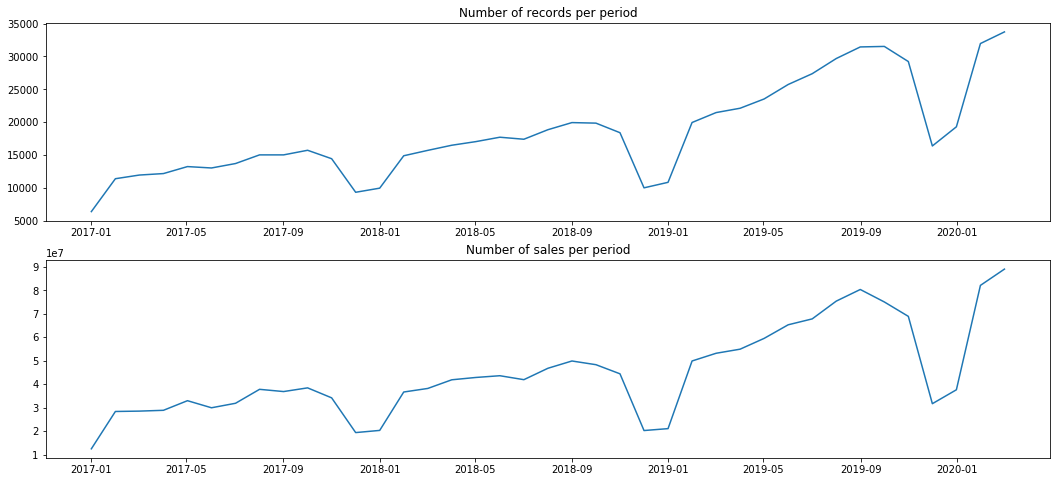

In [94]:
times = pd.date_range(start='2017-01-01', end='2020-03-01',periods=39)
X = np.array(times)

plt.figure(figsize=(18,8))
plt.subplot(211)
plt.plot(X,np.array(list(records_per_periods.values())))
plt.title('Number of records per period')
plt.subplot(212)
plt.plot(X,np.array(list(sales_per_periods.values())))
plt.title('Number of sales per period')